In [107]:
import numpy as np
import pandas as pd

In [108]:
v =  pd.read_csv('Churn_Modelling.csv')

In [109]:
v.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [110]:
v.shape
# only 14 columns we have here
# but rows are 1000 k quite big

(10000, 14)

In [111]:
v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [112]:
v.duplicated().sum()
# no any duplicate row is here

np.int64(0)

In [113]:
v["Exited"].value_counts()
# 2037 customer have left the bank ....

,count
Exited,
0,7963
1,2037


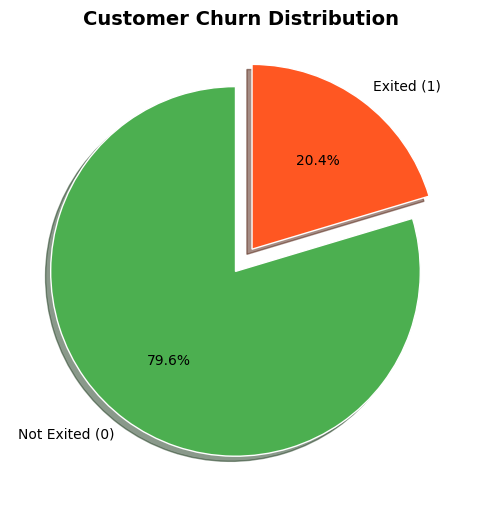

In [114]:
import matplotlib.pyplot as plt

# Count values
counts = v["Exited"].value_counts()

# Labels and explode setup
labels = ['Not Exited (0)', 'Exited (1)']
explode = [0.05, 0.1]  # slice ko thoda alag dikhana ke liye

# Color palette
colors = ['#4CAF50', '#FF5722']  # Green for retained, Orange/Red for exited

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    shadow=True,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}  # slices ke beech me white border
)
plt.title("Customer Churn Distribution", fontsize=14, fontweight='bold')
plt.show()


In [115]:
 v = v.drop(columns = ["RowNumber" , "CustomerId" , "Surname"] , axis = 1)

In [116]:
v.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

**here we are doing one hot encoding in categorical column**

In [117]:
v = pd.get_dummies(v, columns=["Geography", "Gender"], drop_first=True, dtype=int)


In [118]:
v

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [119]:
v.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.106512
Geography_Germany,0.005538,0.046897,-0.000567,0.401110,-0.010419,0.010577,-0.020486,0.010297,0.173488,1.000000,-0.332084,-0.024628


In [120]:
# Correlation of all numeric columns with 'Exited'
correlation = v.corr()['Exited'].sort_values(ascending=False)
print(correlation)


# by this correlation we can  say that more age slightly leads
# more churn ...


Exited               1.000000
Age                  0.285323
Geography_Germany    0.173488
Balance              0.118533
EstimatedSalary      0.012097
HasCrCard           -0.007138
Tenure              -0.014001
CreditScore         -0.027094
NumOfProducts       -0.047820
Geography_Spain     -0.052667
Gender_Male         -0.106512
IsActiveMember      -0.156128
Name: Exited, dtype: float64


In [121]:
x = v.drop(columns = ["Exited"])
y = v["Exited"]

In [122]:
from sklearn.model_selection import  train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state = 1)

In [123]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [124]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [125]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [126]:
# architecture of artificial nueral network :

model = Sequential()
# for inputs layers
model.add(Dense(11 , activation = "relu" , input_dim = 11))
# add another layer
model.add(Dense(11 , activation = "relu" ))

# for outputs layers
model.add(Dense(1 , activation = "sigmoid"))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [127]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [128]:
model.compile(loss = "binary_crossentropy" , optimizer = "Adam", metrics = ["accuracy"])


# 1. model.compile()

# It tells your neural network how to learn —
# i.e., which loss function to minimize and
# which optimizer to use while training.




#  Part 1 → loss="binary_crossentropy"

# This defines what your model is trying to minimize.
# "binary_crossentropy" is used for binary classification problems
# (like predicting whether a customer will exit or not, 0 or 1)



#  Part 2 → optimizer="adam"

# The optimizer decides how the model updates its weights during training.
# “Adam” = Adaptive Moment Estimation
# It’s one of the most popular and efficient optimizers in deep learning.
# In simple words:
# Adam helps the model learn faster and smarter,
#  by adjusting how much each weight should change after every step.

In [129]:
model.fit(x_train_scaled , y_train  , epochs = 100 , validation_split = 0.2)
# we can see that every next epochs our
# loss is  deceasing

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4855 - loss: 0.7320 - val_accuracy: 0.7975 - val_loss: 0.5052
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7927 - loss: 0.4945 - val_accuracy: 0.8006 - val_loss: 0.4491
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7993 - loss: 0.4450 - val_accuracy: 0.8025 - val_loss: 0.4288
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8228 - loss: 0.4118 - val_accuracy: 0.8119 - val_loss: 0.4153
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8149 - loss: 0.4266 - val_accuracy: 0.8219 - val_loss: 0.4031
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8348 - loss: 0.3998 - val_accuracy: 0.8338 - val_loss: 0.3865
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8463 - loss: 0.3848 - val_accuracy: 0.8406 - val_loss: 0.3733
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8468 - loss: 0.3789 - val_accu

In [130]:
history = model.fit(x_train_scaled , y_train  , epochs = 100 , validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8689 - loss: 0.3198 - val_accuracy: 0.8419 - val_loss: 0.3599
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8782 - loss: 0.3148 - val_accuracy: 0.8438 - val_loss: 0.3595
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8689 - loss: 0.3253 - val_accuracy: 0.8438 - val_loss: 0.3600
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8609 - loss: 0.3365 - val_accuracy: 0.8413 - val_loss: 0.3594
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8744 - loss: 0.3096 - val_accuracy: 0.8413 - val_loss: 0.3601
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8702 - loss: 0.3167 - val_accuracy: 0.8431 - val_loss: 0.3593
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8693 - loss: 0.3156 - val_accuracy: 0.8469 - val_loss: 0.3572
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8702 - loss: 0.3217 - val_accu

In [131]:
history.history
# training loss of every epoch

{'accuracy': [0.8684375286102295,
  0.8696874976158142,
  0.8687499761581421,
  0.8706250190734863,
  0.8690624833106995,
  0.8698437213897705,
  0.8676562309265137,
  0.8698437213897705,
  0.8696874976158142,
  0.8707812428474426,
  0.8673437237739563,
  0.8696874976158142,
  0.8687499761581421,
  0.87109375,
  0.8685937523841858,
  0.8692187666893005,
  0.8689062595367432,
  0.8698437213897705,
  0.8700000047683716,
  0.8685937523841858,
  0.8692187666893005,
  0.8700000047683716,
  0.8701562285423279,
  0.8689062595367432,
  0.867968738079071,
  0.8696874976158142,
  0.8698437213897705,
  0.8693749904632568,
  0.8693749904632568,
  0.8701562285423279,
  0.8698437213897705,
  0.8684375286102295,
  0.8682812452316284,
  0.8678125143051147,
  0.8687499761581421,
  0.8696874976158142,
  0.8695312738418579,
  0.87109375,
  0.8689062595367432,
  0.8685937523841858,
  0.8684375286102295,
  0.8693749904632568,
  0.8689062595367432,
  0.8696874976158142,
  0.8700000047683716,
  0.86906248331

In [143]:
len(history.history['loss'])


100

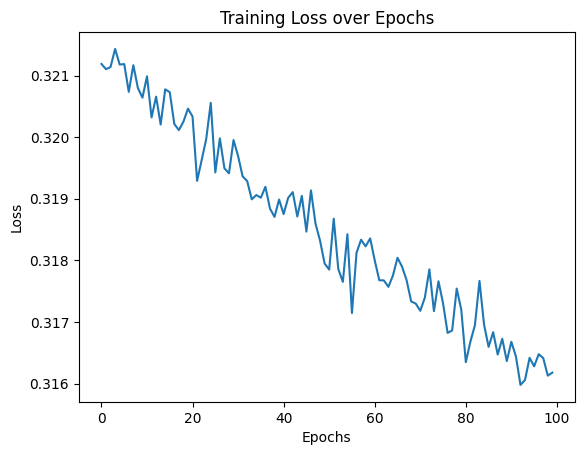

In [148]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()


# it telling before how my loss was at extreme
# after getting trained by every epochs how my loss
# graph is getting decreased....


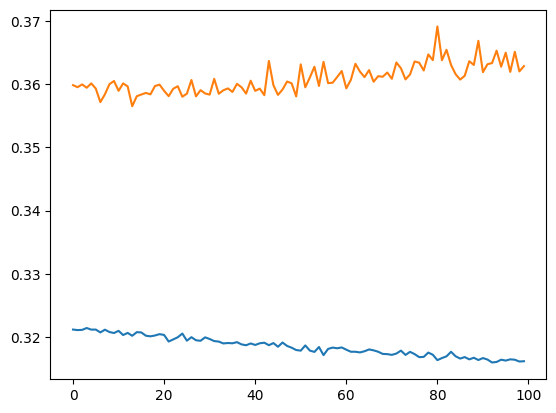

In [141]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


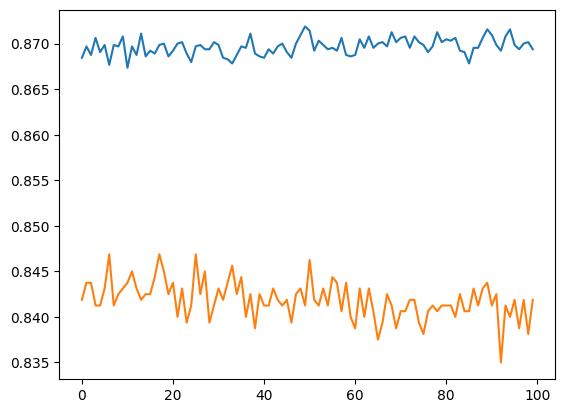

In [152]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [133]:
model.layers[0].get_weights()
# by this code we can see the weights and baises inside
# our model of input to first hidden layers

[array([[ 0.40465394,  0.09968382, -0.078237  ,  0.1000902 , -0.56406206,
          0.03561737,  0.3639791 ,  0.28712705, -0.07315923,  0.58229417,
          0.41564855],
        [-0.74851495,  0.25314826, -0.9032994 ,  0.10250198,  0.07750364,
         -0.96561205, -0.35900575,  0.02913266, -0.9179955 , -0.05003383,
          0.96851414],
        [-0.30272302, -0.03341912,  0.7073257 ,  0.03975879, -0.14936264,
         -0.1385124 ,  0.159274  ,  0.033323  ,  0.27033067, -0.42144617,
          0.3227598 ],
        [ 0.32135686, -0.3035385 ,  0.45516232, -0.25669503, -0.2360115 ,
         -0.02207101, -0.44582856,  0.80993986, -0.08684674, -0.12645538,
         -0.5102039 ],
        [ 0.47497302, -0.9932031 ,  0.07608084,  1.5481176 , -1.0499194 ,
          0.19407459, -0.9923549 ,  1.0407931 ,  0.1571266 , -0.46345526,
          0.15329382],
        [-0.47721004,  0.31707346, -0.4074039 ,  0.11724246, -0.33198285,
         -0.06031322, -0.50227934, -0.17644747,  0.45248017,  0.3484994

In [134]:
model.layers[1].get_weights()
# # by this code we can see the weights and baises inside
# our model of hidden nueron  to output nueron


[array([[ 3.44717652e-01,  1.15796603e-01, -1.08469250e-02,
         -1.24309614e-01, -3.74839115e+00, -2.26166874e-01,
         -1.63274276e+00, -7.74993002e-01,  1.34253308e-01,
         -3.40825140e-01, -4.57328588e-01],
        [-5.99459171e-01, -4.44402754e-01, -3.24952453e-01,
         -7.81752393e-02,  2.74675310e-01,  2.37601086e-01,
          6.97468638e-01, -3.24895442e-01,  2.93286473e-01,
         -3.95227462e-01, -2.05890551e-01],
        [-2.26218963e+00,  4.66198742e-01,  6.76020086e-01,
          7.36701071e-01,  1.75831005e-01, -3.08407336e-01,
          5.63802607e-02, -1.38049722e+00,  1.93826500e-02,
          8.14570785e-02,  4.43402603e-02],
        [-2.00784147e-01,  7.35932495e-03, -1.13402074e-03,
         -6.27909750e-02,  1.65222343e-02,  1.19917881e+00,
          2.02411339e-01, -9.34724510e-01, -2.75487590e+00,
         -9.21801329e-01, -1.49621055e-01],
        [-2.85028398e-01,  4.20132786e-01,  7.92783320e-01,
          5.69630802e-01, -1.28782973e-01,  

In [135]:
model.predict(x_test_scaled)
# here is every prediction of my every given test input
#  here is just probability not 0 and 1 ...because we have used sigmoid
# activation ..now we will decide threshhold manually
# To make the probability  0 and 1


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.0363239 ],
       [0.0958212 ],
       [0.13399108],
       ...,
       [0.00804335],
       [0.04053274],
       [0.16374132]], dtype=float32)

In [136]:
y_log = model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [137]:
# so suppose if our probability of input is above 0.5
#  we will considered that it will leave the bank ..or being churned
#  and turned that probability into 1 ...otherwise if lesser than 0.5
#  we will turned to 0 ...

y_pred = np.where(y_log> 0.5 , 1 , 0)

In [138]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)*100

# our accuracy is 81 percent but if we properly
# tune it we may increase the accuarcay
# 1. incresing the number of epochs

# 2. if we change the activation function of hidden layer
# and keep relu activation it may effective

# 3. if we increase the number of hidden layers nuerons
#      than may it contribute best


86.1

**parameters for tunning the models**

In [139]:
# model.add(Dense(3 , activation = "sigmoid" , input_dim = 11))
# will  change  3 to 4 ....
# will change activation sigmoid to relu
# will add another layer
# model.add(dense(11 , activation = relu)
# lets change the code part and tune i t improve the accuracy
# in artitecture column...

# now will make change in complile code too
# adding accuracy metrics too


# made cahnge in mmodel fit code too
# means  inceasing epochs 10 to now 100 , and add validation split = 0.2
# now data willbe trainned at 80 nad every epoch it will predict
# and will tell the accuracy at every epoch ...
# finally after running every epochs we can get accuracy by real 20 perecents
# iputs too....


# warning ::

# after tuning if only training acuracy is gettng increased
# and validation accuracy is stagnant it means that somewhere
# it is the case of overfitting ... means model is completely
# overfitted



# before tunning we are getting the accuracy of 81 percent
# now we are getting the accuracy of 86 percent